<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/04_residual_model_subclassed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load and preprocess data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Step 2: Define residual block
class ResidualBlock(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.dense1 = layers.Dense(units, activation='relu')
        self.dense2 = layers.Dense(units)
        self.projection = None
        self.activation = layers.Activation('relu')

    def build(self, input_shape):
        input_dim = input_shape[-1]
        if input_dim != self.dense2.units:
            self.projection = layers.Dense(self.dense2.units)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        shortcut = inputs if self.projection is None else self.projection(inputs)
        return self.activation(x + shortcut)

In [6]:
# Step 3: Define model using subclassing
class ResidualRegressor(keras.Model):
    def __init__(self):
        super().__init__()
        self.block1 = ResidualBlock(32)
        self.block2 = ResidualBlock(32)
        self.out = layers.Dense(1)

    def call(self, inputs):
        x = self.block1(inputs)
        x = self.block2(x)
        return self.out(x)

In [7]:
# Step 4: Compile and train
model = ResidualRegressor()
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.6897 - mae: 0.8545 - val_loss: 0.4178 - val_mae: 0.4614
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3934 - mae: 0.4469 - val_loss: 0.3993 - val_mae: 0.4413
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3615 - mae: 0.4254 - val_loss: 0.3774 - val_mae: 0.4329
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3543 - mae: 0.4166 - val_loss: 0.3694 - val_mae: 0.4313
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3300 - mae: 0.4054 - val_loss: 0.3471 - val_mae: 0.4141
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3199 - mae: 0.3998 - val_loss: 0.3381 - val_mae: 0.4053
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3193 - mae: 0.3969 - val_loss: 0.3611 - val_mae: 0.4044
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3289 - mae: 0.3914 - val_loss: 0.3917 - val_mae: 0.4099
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - lo

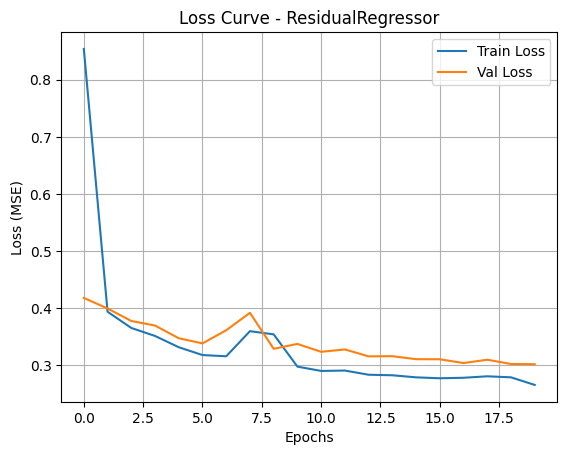

In [8]:
# Step 5: Plot
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve - ResidualRegressor")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()